In [8]:
import pandas as pd

# Load dataset with the correct encoding
df = pd.read_csv("Sample - Superstore.csv", encoding="ISO-8859-1")

# Check for missing values
print(df.isnull().sum())

# Remove duplicates
df = df.drop_duplicates()

# Display the first 5 rows
print(df.head())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  

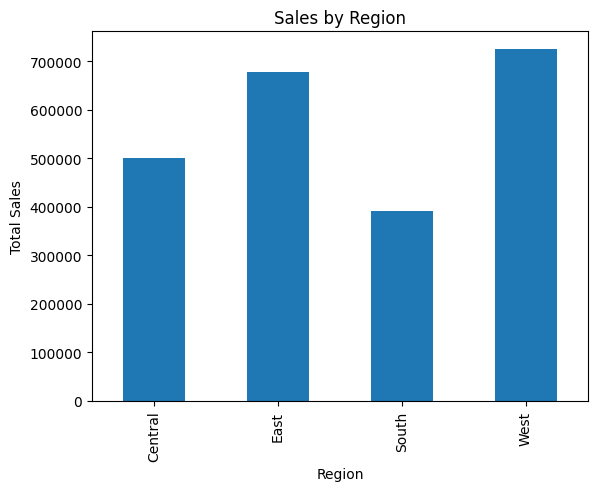

Negative Profits: 1871


In [9]:
import matplotlib.pyplot as plt

# Sales by region
sales_by_region = df.groupby("Region")["Sales"].sum()
sales_by_region.plot(kind="bar", title="Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()

# Negative profits
negative_profits = df[df["Profit"] < 0]
print("Negative Profits:", negative_profits.shape[0])

In [11]:
!pip install pandasql
from pandasql import sqldf

# SQL Query: Find top 5 products with the highest losses
query = """
SELECT "Product Name", SUM(Profit) AS Total_Loss
FROM df
WHERE Profit < 0
GROUP BY "Product Name"
ORDER BY Total_Loss ASC
LIMIT 5;
"""
print(sqldf(query))

                                       Product Name  Total_Loss
0         Cubify CubeX 3D Printer Double Head Print  -9239.9692
1         GBC DocuBind P400 Electric Binding System  -6859.3896
2         Lexmark MX611dhe Monochrome Laser Printer  -5269.9690
3  GBC Ibimaster 500 Manual ProClick Binding System  -5098.5660
4        GBC DocuBind TL300 Electric Binding System  -4162.0336


In [12]:
df.to_csv("cleaned_superstore.csv", index=False)